### Import flexpepdock data and run some stats and plot some things.

In [1]:
import pandas as pd
from os import listdir
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Get the list of filenames to import
subdir = './data'
file_list = listdir(subdir)[1:] # Skip the first file because it is a mac system file that we don't need.
print(file_list)

['nativepep.txt', 'pep78.txt', 'pep79.txt', 'pep86.txt', 'pep104.txt', 'pep101.txt', 'pep128.txt', 'pep114.txt', 'pep99.txt']


In [3]:
# Get Kds imported. I just typed these in manually from the SI document
kds = {'pep86':0.7E-9,
       'pep78':3.4E-9,
       'pep79':8.5E-9,
       'pep99':1.8E-7,
       'pep128':2.8E-7,
       'nativepep':0.9E-6,
       'pep104':1.3E-6,
       'pep101':2.5E-6,
       'pep114':1.9E-4
       }

In [4]:
# Organise everything into a single dataframe
frames = []
for file in file_list:
    peptide = file[:-4]
    frame = pd.read_csv(subdir+'/'+file, delimiter='\t')
    frame['peptide'] = peptide
    frame['KD'] = kds[peptide]
    frames.append(frame)

flexpep_data = pd.concat(frames)
flexpep_data.drop(columns=['Unnamed: 16'], inplace=True) # not sure where this column came from but we can delete it

# Don't worry about what melted does, this was something that I was using to look at ways to plot the data.
flexpep_melted = flexpep_data.melt(id_vars=['peptide','KD'], value_vars=['total_score', 'I_sc', 'fa_atr', 'fa_dun', 'fa_pair', 'fa_rep',
       'fa_sol', 'hbond_sc', 'pep_sc', 'pep_sc_noref', 'rama', 'rmsALL_if',
       'rmsBB', 'rmsBB_if', 'startRMSbb'])

#### Here's what the ``DataFrame`` data structure looks like. It's essentially the python equivalent of a spreadsheet. Notice that I combined all the data by adding a column called ``peptide`` that specifies the identity of the peptide that each datapoint corresponds to. In data science it's generally better to have each row in a dataset correspond to a single datapoint and then add columns that are either categorical or ordinal to give details about each datapoint. In this case, each row is a different structure modeled by flexpepdock.

In [5]:
flexpep_data.head()

,total_score,I_sc,fa_atr,fa_dun,fa_pair,fa_rep,fa_sol,hbond_sc,pep_sc,pep_sc_noref,rama,rmsALL_if,rmsBB,rmsBB_if,startRMSbb,description,peptide,KD
0,-309.393,-50.333,-600.263,97.950,-8.696,61.875,288.639,-10.795,-12.318,-12.038,-1.705,1.318,0.888,0.774,0.0,top_1.pdb,nativepep,9.000000e-07
1,-308.773,-49.740,-598.489,97.558,-8.372,61.848,286.102,-10.636,-12.651,-12.371,-1.714,1.014,1.188,0.842,0.0,top_2.pdb,nativepep,9.000000e-07
2,-308.701,-51.668,-601.871,99.573,-8.750,62.331,290.379,-10.947,-12.018,-11.738,-1.510,0.901,0.945,0.726,0.0,top_3.pdb,nativepep,9.000000e-07
3,-308.467,-49.731,-598.009,96.383,-8.289,61.493,285.820,-9.636,-12.430,-12.150,-1.464,1.036,1.213,0.839,0.0,top_4.pdb,nativepep,9.000000e-07
4,-308.423,-49.697,-599.491,96.614,-8.739,61.676,287.471,-9.640,-13.050,-12.770,-1.566,1.255,0.984,0.826,0.0,top_5.pdb,nativepep,9.000000e-07


#### The plotting command below is from the package ``seaborn`` it's a nice tools for quickly generating publication-level plots.

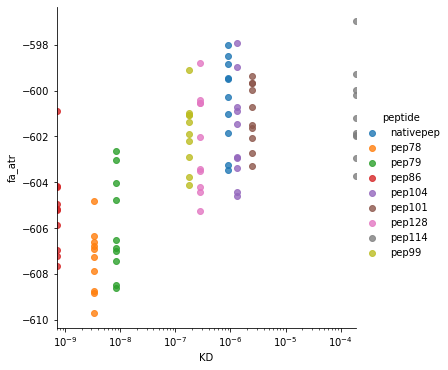

In [6]:
sn.lmplot(x='KD', y='fa_atr', data=flexpep_data, hue='peptide')
plt.xscale('log')

#### Notice above that I'm plotting all the raw values on the same plot. This is generally better than averaging because it gives us an idea where ALL the data is distributed.

In [7]:
# Try the Spearman correlation
flexpep_data.corr('spearman')['KD']

total_score     0.422976
I_sc            0.455362
fa_atr          0.650156
fa_dun         -0.129369
fa_pair        -0.240020
fa_rep         -0.524266
fa_sol         -0.279940
hbond_sc        0.153222
pep_sc          0.385456
pep_sc_noref    0.391253
rama            0.219899
rmsALL_if      -0.168796
rmsBB          -0.181634
rmsBB_if       -0.373542
startRMSbb           NaN
KD              1.000000
Name: KD, dtype: float64

In [8]:
# Log the KD column first
import numpy as np
flexpep_data['logKD'] = np.log10(flexpep_data['KD'])
flexpep_data.corr('spearman')['logKD']

total_score     0.422976
I_sc            0.455362
fa_atr          0.650156
fa_dun         -0.129369
fa_pair        -0.240020
fa_rep         -0.524266
fa_sol         -0.279940
hbond_sc        0.153222
pep_sc          0.385456
pep_sc_noref    0.391253
rama            0.219899
rmsALL_if      -0.168796
rmsBB          -0.181634
rmsBB_if       -0.373542
startRMSbb           NaN
KD              1.000000
logKD           1.000000
Name: logKD, dtype: float64

### CONCLUSIONS: Looks like we don't need to worry about using a ``log10()`` if we use the Spearman correlation. It also looks like this matches well with the R^2 result that we got with excel: ``fa_atr``, which corresponds to the "full atom attractive force" seems to correlate well with the KD.